In [1]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from scripts import MONGO_URL
from scripts.analysis import data, plot

plot.init_matplotlib()

In [2]:
repos_with_campaign = data.get_repos_with_campaign()

In [16]:
word_freq = {}
text_corpora = []
for repo in repos_with_campaign:
    repo_name = repo.split("/")[1]
    text = []
    for x in repo_name.split("-"):
        for y in x.split("_"):
            for word in y.split("."):
                if len(word) <= 1:
                    continue
                word = word.lower()
                if word in word_freq:

                    word_freq[word] += 1
                    text.append(word)
                else:
                    word_freq[word] = 1
                    text.append(word)
    if len(text) > 0:
        text_corpora.append(text)
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]

[('bot', 1030),
 ('crack', 705),
 ('2024', 701),
 ('adobe', 546),
 ('free', 536),
 ('auto', 509),
 ('pro', 470),
 ('activation', 435),
 ('autoclicker', 391),
 ('crypto', 301),
 ('hack', 296),
 ('cracked', 259),
 ('version', 254),
 ('ai', 248),
 ('generator', 236),
 ('main', 229),
 ('wallet', 222),
 ('executor', 191),
 ('studio', 186),
 ('download', 185)]

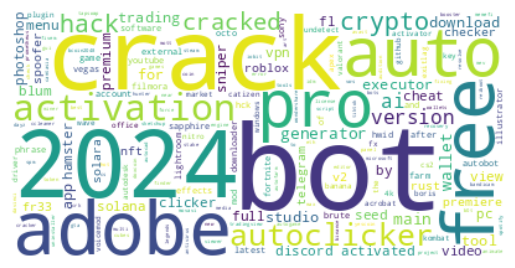

In [7]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("plots/wordcloud.pdf")

In [21]:
from pprint import pprint
import gensim
from gensim import corpora

# Create Dictionary
id2word = corpora.Dictionary(text_corpora)
corpus = [id2word.doc2bow(text) for text in text_corpora]
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=10)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.021*"executor" + 0.015*"bot" + 0.015*"solara" + 0.015*"free" + '
  '0.012*"studio" + 0.010*"fl" + 0.010*"activation" + 0.010*"sapphire" + '
  '0.009*"hack" + 0.009*"plugin"'),
 (1,
  '0.031*"2024" + 0.021*"adobe" + 0.014*"menu" + 0.011*"pro" + '
  '0.011*"activation" + 0.010*"ai" + 0.010*"auto" + 0.009*"mod" + '
  '0.008*"hamster" + 0.008*"crack"'),
 (2,
  '0.015*"cracked" + 0.014*"pro" + 0.012*"2024" + 0.012*"version" + '
  '0.010*"full" + 0.010*"wallet" + 0.010*"crack" + 0.010*"main" + 0.009*"hack" '
  '+ 0.009*"crypto"'),
 (3,
  '0.057*"bot" + 0.036*"pro" + 0.027*"free" + 0.026*"auto" + 0.017*"crack" + '
  '0.016*"2024" + 0.016*"adobe" + 0.014*"autoclicker" + 0.010*"activation" + '
  '0.008*"main"'),
 (4,
  '0.031*"autoclicker" + 0.012*"version" + 0.012*"hack" + 0.009*"2024" + '
  '0.009*"generator" + 0.007*"activated" + 0.006*"fr33" + 0.006*"tool" + '
  '0.006*"discord" + 0.006*"vws"'),
 (5,
  '0.016*"adobe" + 0.015*"bot" + 0.014*"2024" + 0.011*"autoclicker" + '
  '0.011*